In [3]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))

In [ ]:
set.seed(42)
getwd()

In [1]:
coembed <- readRDS("../data/coembed/coembed.cleaning.Rds")
coembed

Loading required package: Signac



An object of class Seurat 
230075 features across 59045 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [4]:
## add annotation
new.cluster.ids <- c("0" = "healthy_CM",
               "1" = "intermediate_CM",
               "2" = "damaged_CM",
               "3" = "vCM_3",
               "4" = "vCM_4")

Idents(coembed) <- "RNA_snn_res.0.1"

coembed <- RenameIdents(coembed, new.cluster.ids)
coembed$annotation <- Idents(coembed)

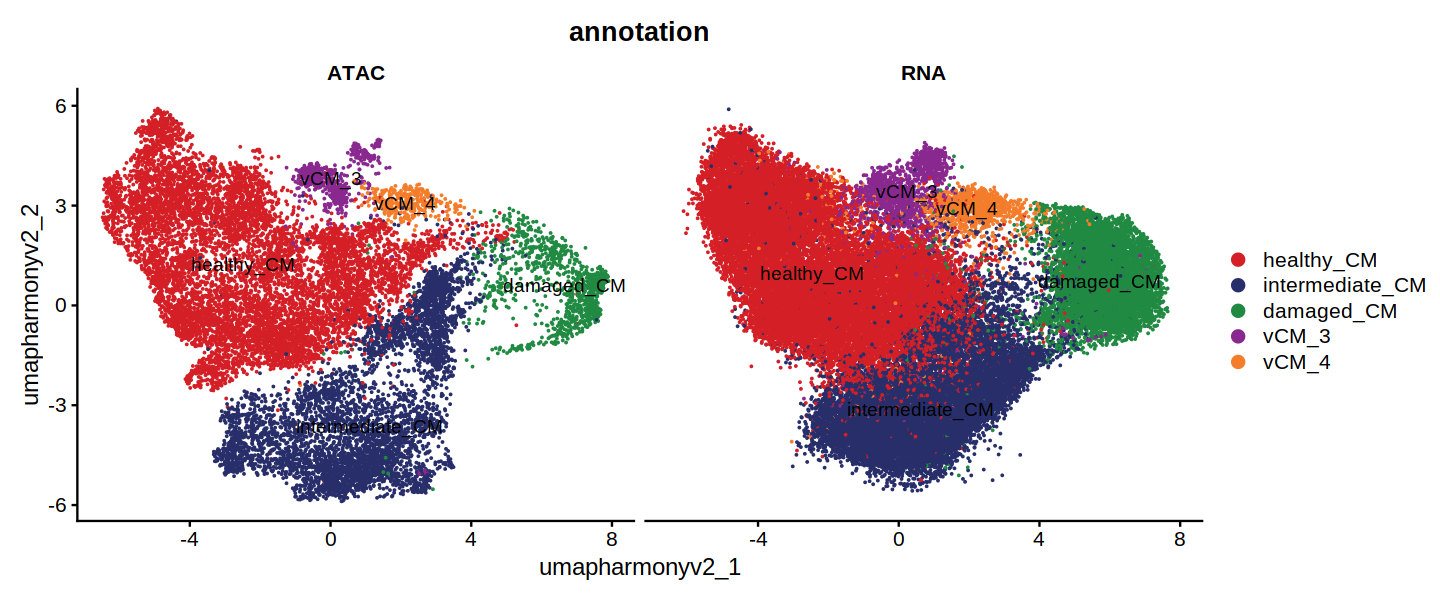

In [12]:
cols.annotation <- ArchR::paletteDiscrete(coembed@meta.data[, glue::glue("annotation")])

options(repr.plot.height = 5, repr.plot.width = 12)

DimPlot(coembed, reduction = "umap_harmony_v2", label = TRUE, group.by = "annotation",
       cols = cols.annotation, split.by = "tech")

In [ ]:
all.markers <- FindAllMarkers(coembed, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

p <- DotPlot(coembed, features = unique(df$gene)) + RotatedAxis()
    
options(repr.plot.height = 5, repr.plot.width = 15)

print(p)

In [ ]:
if(!dir.exists("../data/coembed/MarkerGenesAfterAnnotation")){
    dir.create("../data/coembed/MarkerGenesAfterAnnotation")
}

markerList <- split(all.markers, all.markers$cluster)
    
for(i in 1:length(markerList)){
        markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}
    
    WriteXLS::WriteXLS(markerList,
                   ExcelFileName = glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.xlsx"),
                   SheetNames = names(markerList))

saveRDS(all.markers, glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.rds"))

In [ ]:
saveRDS(coembed, file = "../data/coembed/coembed.annotation.Rds")